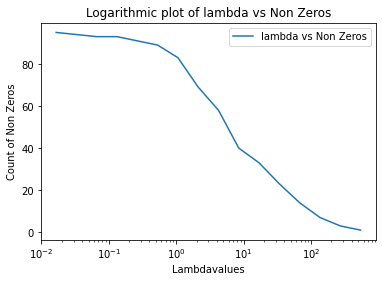

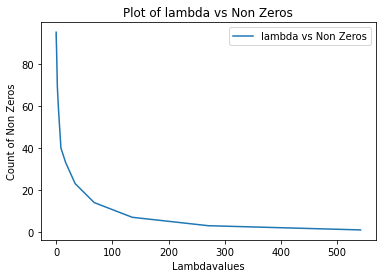

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")
n=1595
d=96
y=np.zeros(n)
X=df_train.drop('ViolentCrimesPerPop',axis=1).values
y=df_train['ViolentCrimesPerPop'].values
W=np.zeros(d-1)
count1=[]
lambda1=[]
lambdaa=np.zeros(n)
sum=0

for i in range(1595):
    sum=sum+y[i]
sum=sum/1595

#claculating the values of lambdamax
for k in range(95):
    lam=0
    for i in range(1595):
        lam=2*df_train.iloc[i][k+1]*(y[i]-sum)+lam
    lambdaa[k]=np.linalg.norm(lam)
lambdamax=np.max(lambdaa)

#looping over the lambda
while lambdamax>0.01:
    ak=np.zeros(d-1)
    b=np.zeros(n)
    ck=np.zeros(d-1)
    check=np.zeros(d-1)
    epsilon=np.zeros(d-1)
    count=0
    converged=False       # making the loop enter
    #convergence loop 
    while not converged:
        b=np.sum(y-np.dot(X,W.T))
        b=b/n
        check[:]=W
        
        #looping over each and every column 
        for k in range(d-1):
            Xk=X[:,k]
            Xj=np.delete(X,k, axis=1)
            Wj=np.delete(W,k,axis=0)
            ak=2*np.sum(np.square(Xk))
            ck=2*np.sum(np.dot(Xk.T,(y-(b+np.dot(Xj,Wj.T)))))         
            if ck<-lambdamax:
                W[k]=(ck+lambdamax)/ak
            elif ck >= -lambdamax and ck <= lambdamax:
                W[k]=0
            else:
                W[k]=(ck-lambdamax)/ak
                
        #storing the values of difference in epsilon to check the convergence         
        epsilon=np.absolute(np.array(W) - np.array(check))
        converged=True
        
        #checking the converged
        for i in range(d-1):
            if epsilon[i]>0.01:
                converged=False
                break  
    
    #counting the number of non zeros
    for i in range(d-1):
        if W[i]!=0:
            count=count+1  
            
    count1.append(count)             #appending the values
    lambda1.append(lambdamax)        #appedning the lambdavalues
    lambdamax=lambdamax/2

fig1=plt.figure("logarithmic plot")
plt.xlabel('Lambdavalues')
plt.ylabel('Count of Non Zeros')
plt.semilogx(lambda1,count1,label='lambda vs Non Zeros')
plt.title("Logarithmic plot of lambda vs Non Zeros")
plt.legend()

fig2=plt.figure("Normal plot")
plt.xlabel('Lambdavalues')
plt.ylabel('Count of Non Zeros')
plt.plot(lambda1,count1,label='lambda vs Non Zeros')
plt.title("Plot of lambda vs Non Zeros")
plt.legend()
plt.show()

         
